In [2]:
#pip install openpyxl
#pip install jupyter_contrib_nbextensions

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
data = pd.read_excel(r'./data.xlsx')
df = pd.DataFrame(data)

In [28]:
df.dropna(subset=['rgdpna'], inplace=True)

def calc5(row):
    year = row['year']
    country = row['country']
    rgdpna = row['rgdpna']
    tally = 0
    y1 = 1
    y2 = 1
    y5 = 1
    
    future = year
    while future <= year + 5:
        future += 1
        future_rgdpna = df.loc[(df['country'] == country) & (df['year'] == future), 'rgdpna']

        if future_rgdpna.empty:
            return pd.Series([None, None, None, None])
        else:
            tally += future_rgdpna.iloc[0] / rgdpna - 1
            
            if future == year + 1:
                y1 = future_rgdpna.iloc[0] / rgdpna - 1
            elif future == year + 2:
                y2 = future_rgdpna.iloc[0] / rgdpna - 1
            elif future == year + 5:
                y5 = future_rgdpna.iloc[0] / rgdpna - 1
   

    return pd.Series([tally, y1, y2, y5])



#add colums
df[['calc5', 'y1', 'y2', 'y5']] = df.apply(lambda row: calc5(row), axis=1)
#calc5 for 5 years in the future growth added every year, not exponential
#the others exponentioal


df['workingPop'] = df['emp'] / df['pop']
df['expenditure'] = df['ccon'] / df['cn']

df.sample(n=10)

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,pl_x,pl_m,pl_n,pl_k,calc5,y1,y2,y5,workingPop,expenditure
8447,MWI,Malawi,Kwacha,1997,1.224157e+04,1.209106e+04,10.264906,4.230830,NaN,1.508639,...,0.512442,0.507080,0.214729,NaN,0.160548,1.202359e-02,0.024571,0.017157,0.412165,0.612416
1665,BOL,Bolivia (Plurinational State of),Boliviano,2005,3.686141e+04,3.597514e+04,9.232306,4.046131,NaN,2.613873,...,0.513046,0.429015,0.221210,0.665211,NaN,NaN,NaN,NaN,0.438258,0.385101
6515,KOR,Republic of Korea,Won,1955,2.599132e+04,2.606760e+04,21.521539,6.170075,2557.309588,1.857497,...,0.098218,0.077752,0.048341,NaN,0.924013,4.613400e-02,0.115893,0.189134,0.286693,0.125090
5288,HTI,Haiti,Gourde,1988,1.000402e+04,1.091029e+04,6.758223,2.203852,NaN,1.319199,...,0.458763,0.440189,0.148232,NaN,-0.419472,-2.913429e-02,-0.019055,-0.105065,0.326099,0.167860
114,AGO,Angola,Kwanza,1994,3.615769e+04,3.579054e+04,13.503747,7.466424,NaN,1.199139,...,0.401066,0.522183,0.251835,0.476991,2.365626,1.500001e-01,0.305760,0.498447,0.552915,0.059912
6401,KHM,Cambodia,Riel,1981,5.945376e+03,5.923138e+03,6.749847,2.945439,NaN,1.342158,...,0.289278,0.282720,0.135302,NaN,0.924783,8.830189e-08,0.044334,0.190615,0.436371,0.450578
1239,BHR,Bahrain,Bahraini Dinar,1999,1.306040e+04,1.323277e+04,0.636541,0.233598,NaN,2.320514,...,0.423869,0.493190,0.517301,1.586873,1.170907,7.018162e-02,0.096840,0.289059,0.366980,0.175681
6522,KOR,Republic of Korea,Won,1962,3.222165e+04,3.362648e+04,26.383169,7.324624,2829.413815,1.676018,...,0.122436,0.127760,0.047936,0.407991,1.848620,7.791889e-02,0.163106,0.436482,0.277625,0.165292
9701,PSE,State of Palestine,US Dollar,1991,5.144825e+03,5.240500e+03,2.191002,0.413338,NaN,NaN,...,0.504643,0.449504,0.386874,NaN,3.598912,2.388227e-01,0.369970,0.722976,0.188652,0.243551
12151,USA,United States,US Dollar,1991,9.831967e+06,9.939456e+06,254.539370,121.567062,1787.337817,3.452302,...,0.612786,0.620122,0.474347,1.000000,0.752543,3.522446e-02,0.063723,0.179148,0.477596,0.201450


In [9]:
df.dropna(subset=['y5'], inplace=True)

# Assuming df is your DataFrame
subset_df = df[['year', 'country', 'calc5', 'y5', 'y2', 'y1', 'rgdpna', 'avh', 'workingPop', 'hc', 'ctfp', 'expenditure', 'xr']]
dfs = subset_df.sort_values(by='calc5', ascending=False)

# Combine NaN filtering for 'avh' and 'cn' using any(axis=1)
#print(dfs.count())
#dfs = dfs.dropna(subset=['avh', 'expenditure'])
#print(dfs.count())
#dfs = dfs.dropna(subset=['avh', 'workingPop', 'hc', 'ctfp', 'expenditure', 'xr'])
#print(dfs.count())
# Display the resulting DataFrame
#dfs.sample(n=5)

#df.dropna(inplace=True)
#print(dfs.count())


#df.groupby('country').sum()
dfs.sample(n=6)

,year,country,calc5,y5,y2,y1,rgdpna,avh,workingPop,hc,ctfp,expenditure,xr
7024,1974,Lesotho,1.402451,0.343008,0.069921,-0.081794,1145.292969,NaN,NaN,1.569523,NaN,1.467843,0.679477
5061,1971,"China, Hong Kong SAR",2.041899,0.484803,0.241943,0.106117,32034.150391,2527.05056,0.401425,1.939989,0.947361,0.391301,5.980410
9189,1969,Pakistan,1.223389,0.286192,0.129683,0.112435,101327.164062,NaN,0.295316,1.185283,NaN,0.770918,4.761900
11070,1960,Syrian Arab Republic,1.959366,0.469514,0.392196,0.015831,20519.195312,NaN,0.305332,1.225659,NaN,0.223842,3.654974
4662,1992,Guinea-Bissau,0.512891,0.204502,0.053062,0.022760,1824.118530,NaN,0.380900,NaN,NaN,0.325858,101.425013
7145,1955,Luxembourg,0.719706,0.159269,0.095837,0.042735,5986.648926,NaN,0.439175,1.587244,1.066841,0.196629,1.239220


In [30]:
dfs.dropna(subset=['y5'], inplace=True)
dfs['top_10y'] = 0.0

for year, group in dfs.groupby('year'):
    
    # Get the top 10 rows based on calc5
    top_10 = group.nlargest(10, 'y5')

        
    dfs.loc[top_10.index, 'top_10y'] = 1


dfs.reset_index(drop=True, inplace=True)

pd.set_option('display.max_rows', None)
dfs.sample(n=100)


,year,country,calc5,y5,y2,y1,rgdpna,avh,workingPop,hc,ctfp,expenditure,xr,top_10y
5380,1998,Brunei Darussalam,0.644603,0.164031,0.059929,0.030530,2.290058e+04,2018.324307,0.421419,2.595047,0.746629,0.095949,1.673602e+00,0.0
2792,1997,Bahrain,1.167305,0.259760,0.111323,0.048880,2.849372e+04,2018.324307,0.347795,2.278325,0.923622,0.189704,3.760000e-01,0.0
7539,1981,Nicaragua,-0.037054,-0.030314,0.037592,-0.008164,1.639966e+04,2018.324307,0.250748,1.555159,1.115039,0.285668,3.390919e-09,0.0
3442,1956,Philippines,1.027777,0.244444,0.088889,0.050000,6.434854e+04,2018.324307,0.333428,1.452362,0.445135,0.323509,1.999431e+00,0.0
2377,1972,Turkey,1.272198,0.334822,0.090385,0.032618,2.966370e+05,2069.000000,0.325021,1.330206,0.976248,0.290934,1.415000e-05,0.0
84,2000,Sierra Leone,3.764484,0.819165,0.493873,0.181699,4.076175e+03,2018.324307,0.339264,1.360253,0.245134,0.295553,2.092125e+03,1.0
2024,2004,Egypt,1.387630,0.340740,0.116217,0.044717,6.618759e+05,2018.324307,0.249188,2.113104,0.987164,0.633651,6.196242e+00,0.0
8101,1978,Nicaragua,-1.213054,-0.159169,-0.230882,-0.264788,2.023730e+04,2018.324307,0.375784,1.511045,0.746629,0.356304,2.060644e-09,0.0
3641,1967,Denmark,0.991852,0.222120,0.124126,0.055944,1.071694e+05,1953.661828,0.480803,2.700237,0.842886,0.215229,6.956542e+00,0.0
797,1952,Taiwan,2.035539,0.480194,0.200502,0.094940,1.035769e+04,2353.476914,0.389768,1.464793,0.746629,0.556177,1.030000e+01,1.0


In [31]:
from sklearn import svm

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import pandas as pd

rdf = dfs.copy()

# Assuming 'avh', 'workingPop', 'hc', 'ctfp', 'expenditure', 'xr', 'top_10y', 'calc5' are columns in your DataFrame
columns_to_fill = ['avh', 'workingPop', 'hc', 'ctfp', 'expenditure', 'xr']
rdf[columns_to_fill] = rdf[columns_to_fill].fillna(rdf[columns_to_fill].mean())


X = rdf[['avh', 'workingPop', 'hc', 'ctfp', 'expenditure', 'xr']]
y = rdf['y5']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Calculate predictions on the test set
y_pred = knn_regressor.predict(X_test)

#print(y_pred)


# Extract 'y5' for the test set
rdf.loc[X_test.index, 'fc5'] = y_pred
rdf = rdf[['fc5'] + [col for col in rdf.columns if col != 'fc5']]





rdf.sample(n=10)

           fc5  year                         country     calc5        y5  \
4211       NaN  1970                        Suriname  0.880836  0.182347   
3774       NaN  1999                         Liberia  0.964038 -0.015396   
2891       NaN  1977                         Romania  1.143640  0.237619   
3099       NaN  1986                           Ghana  1.100010  0.265433   
5614  0.324122  2002                          Mexico  0.593250  0.152875   
3232       NaN  1995                        Malaysia  1.068981  0.263658   
5821       NaN  1974  St. Vincent and the Grenadines  0.553098  0.190186   
644        NaN  1997                  Cayman Islands  2.187651  0.391232   
3092  0.047764  1971                           Congo  1.102246  0.258804   
3105  0.174656  2005        Turks and Caicos Islands  1.099138  0.095487   

            y2        y1        rgdpna          avh  workingPop        hc  \
4211  0.113482  0.064016  3.023678e+03  2018.324307    0.375784  1.961020   
3774  0.3

In [37]:
filtered_df = rdf[rdf['top_10y'] == 1.0]
average_calc5 = filtered_df['y5'].mean()
filtered = rdf[rdf['top_10y'] == 0.0]
average = filtered['y5'].mean()


print(f"Average 'calc5' for rows with average = 0.0: {average}")


print(f"Average 'calc5' for rows with Predicted = 1.0: {average_calc5}")

#Average 'calc5' for rows with average = 0.0: 2.5953089363070467
#Average 'calc5' for rows with Predicted = 1.0: 11.577841821990294

Average 'calc5' for rows with average = 0.0: 0.1967599414563182
Average 'calc5' for rows with Predicted = 1.0: 0.7714417752785027


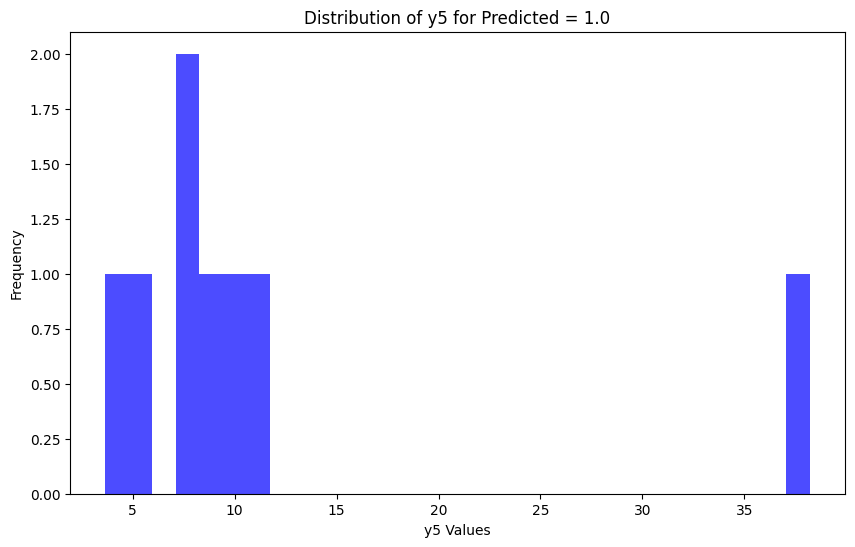

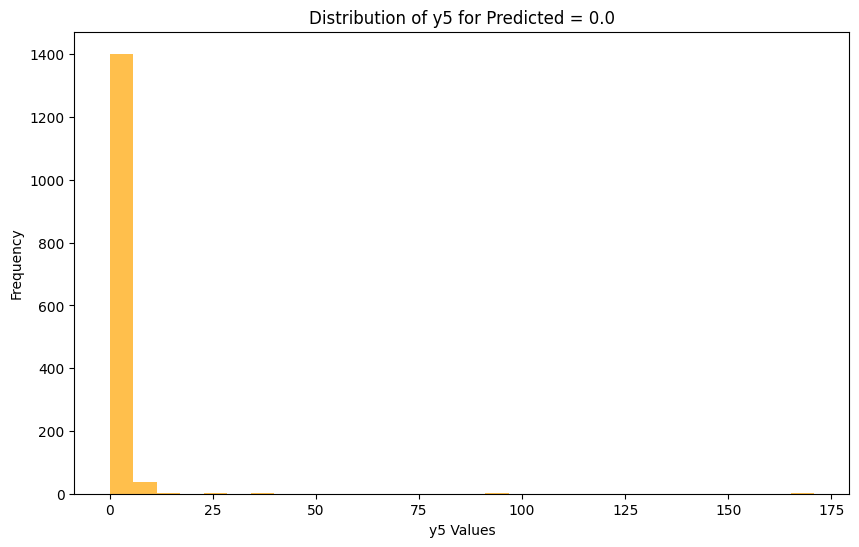

In [62]:
import matplotlib.pyplot as plt

# Assuming 'y5' and 'Predicted' are columns in your original DataFrame 'df'

# Filter rows where 'Predicted' is equal to 1.0
filtered_df_1 = results_df[results_df['Predicted'] == 1.0]

# Filter rows where 'Predicted' is equal to 0.0
filtered_df_0 = results_df[results_df['Predicted'] == 0.0]

# Plot histograms for 'y5' for rows with 'Predicted' equal to 1.0
plt.figure(figsize=(10, 6))
plt.hist(filtered_df_1['y5'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of y5 for Predicted = 1.0')
plt.xlabel('y5 Values')
plt.ylabel('Frequency')
plt.show()

# Plot histograms for 'y5' for rows with 'Predicted' equal to 0.0
plt.figure(figsize=(10, 6))
plt.hist(filtered_df_0['y5'].dropna(), bins=30, color='orange', alpha=0.7)
plt.title('Distribution of y5 for Predicted = 0.0')
plt.xlabel('y5 Values')
plt.ylabel('Frequency')
plt.show()
